#  Billboard Music Classification
Datasets:

[Spotify and Youtube ](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

Billboard Data
https://github.com/azhadsyed/billboard-hot-or-not

[Hot or Not](https://towardsdatascience.com/hot-or-not-analyzing-60-years-of-billboard-hot-100-data-21e1a02cf304)

Spotify is a music streaming platform offering numerous songs. Our research project employed Spotify data sourced from Kaggle, encompassing a multitude of music features. The primary objective was to construct a predictive model designed to ascertain the success of a given song. To establish a metric for success, we integrated Billboard data from Kaggle, which contained the weekly ranking of the top 100 songs based on their sales and popularity. We employed data visualization to investigate patterns and features within the dataset. For our model, we utilized Logistic Regression, KNN, Decision Tree, Random Forest, and Neural Network as classification models, followed by a comparative analysis to refine and improve their performance.

# Load Data

In [1]:
# import Python packages
import pandas as pd
from pandas import DataFrame
import numpy as np
from google.colab import files
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
# regression package
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Data Analytics/Data Analytics Team")
!pwd

Mounted at /content/drive
/content/drive/My Drive/Data Analytics/Data Analytics Team


In [3]:
df = pd.read_csv('Spotify_Youtube.csv')
pd.set_option('display.max_columns', None)
df = df.drop(df.columns[0], axis=1)
df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,https:

In [4]:
import pickle

with open('hot100-clean.pkl', 'rb') as f:
    hot100 = pickle.load(f)

hot100

,title,artist,rank,chart_name,chart_date,chart_date_64,main_artist,featured_artist
0,WAP,Cardi B Featuring Megan Thee Stallion,1,The Hot 100,2020-09-26,2020-09-26,"(Cardi B,)","(Megan Thee Stallion,)"
1,Dynamite,BTS,2,The Hot 100,2020-09-26,2020-09-26,"(BTS,)",NaN
2,Laugh Now Cry Later,Drake Featuring Lil Durk,3,The Hot 100,2020-09-26,2020-09-26,"(Drake,)","(Lil Durk,)"
3,Rockstar,DaBaby Featuring Roddy Ricch,4,The Hot 100,2020-09-26,2020-09-26,"(DaBaby,)","(Roddy Ricch,)"
4,Blinding Lights,The Weeknd,5,The Hot 100,2020-09-26,2020-09-26,"(The Weeknd,)",NaN
...,...,...,...,...,...,...,...,...
95,Over And Over,Thurston Harris,96,The Hot 100,1958-08-04,1958-08-04,"(Thurston Harris,)",NaN
96,I Believe In You,Robert & Johnny,97,The Hot 100,1958-08-04,1958-08-04,"(Robert, Johnny)",NaN
97,Little Serenade,The Ames Brothers,98,The Hot 100,1958-08-04,1958-08-04,"(The Ames Brothers,)",NaN
98,I'll Get By (As Long As I Have You),Billy Williams,99,The Hot 100,1958-08-04,1958-08-04,"(Billy Williams,)",NaN


This data has all the songs that have been in the hot 100 chart on billboard

In [5]:
hot100[hot100['title'] == 'teachme']

,title,artist,rank,chart_name,chart_date,chart_date_64,main_artist,featured_artist
64,teachme,Musiq Soulchild,65,The Hot 100,2007-10-06,2007-10-06,"(Musiq Soulchild,)",NaN
65,teachme,Musiq Soulchild,66,The Hot 100,2007-09-29,2007-09-29,"(Musiq Soulchild,)",NaN
58,teachme,Musiq Soulchild,59,The Hot 100,2007-09-22,2007-09-22,"(Musiq Soulchild,)",NaN
56,teachme,Musiq Soulchild,57,The Hot 100,2007-09-15,2007-09-15,"(Musiq Soulchild,)",NaN
55,teachme,Musiq Soulchild,56,The Hot 100,2007-09-08,2007-09-08,"(Musiq Soulchild,)",NaN
50,teachme,Musiq Soulchild,51,The Hot 100,2007-09-01,2007-09-01,"(Musiq Soulchild,)",NaN
46,teachme,Musiq Soulchild,47,The Hot 100,2007-08-25,2007-08-25,"(Musiq Soulchild,)",NaN
41,teachme,Musiq Soulchild,42,The Hot 100,2007-08-18,2007-08-18,"(Musiq Soulchild,)",NaN
49,teachme,Musiq Soulchild,50,The Hot 100,2007-08-11,2007-08-11,"(Musiq Soulchild,)",NaN
51,teachme,Musiq Soulchild,52,The Hot 100,2007-08-04,2007-08-04,"(Musiq Soulchild,)",NaN


the same song by the same artist could be in the billboard for multiple days with multiple ranks, so we need to groupby title, artist and only keep one row

In [6]:
hot100_indicator = hot100.groupby(['title','artist']).size().rename('count').reset_index()
hot100_indicator

,title,artist,count
0,"""B"" Girls",Young And Restless,15
1,"""Cherry Cherry"" from Hot August Night",Neil Diamond,10
2,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),9
3,"""Joy"" Pt. I",Isaac Hayes,9
4,"""Roots"" Medley",Quincy Jones,7
...,...,...,...
28952,teachme,Musiq Soulchild,20
28953,whoa (mind in awe),XXXTENTACION,3
28954,whoknows,Musiq,13
28955,www.memory,Alan Jackson,15


# Preprocessing


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

Check missing data, need to drop null values

In [9]:
# Drop missing data
df.dropna(inplace = True)
# drop duplicates
df.drop_duplicates(subset=None, keep='first')

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,https:

In [10]:
len(df) # 5% of missing values, it's ok to drop the rows

19170

In [11]:
# Merge Data
merged_df = df.merge(hot100_indicator, how='left',left_on=['Track', 'Artist'], right_on=['title','artist'])
merged_df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,NaN,NaN,NaN
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,NaN,NaN,NaN
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,NaN,NaN,NaN
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,NaN,NaN,NaN
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,Clint Eastwood,Gorillaz,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,NaN,NaN,NaN
19166,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,NaN,NaN,NaN
19167,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,NaN,NaN,NaN
19168,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY 

In [12]:
merged_df[merged_df['count'].notnull()].shape
# this df contains all the songs that have made it to the hot 100 on billboard

(1772, 30)

In [13]:
# Create Target Variable
merged_df['billboard'] = np.where(merged_df['count'].notnull(), 1,0)
merged_df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count,billboard
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,NaN,NaN,NaN,0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,NaN,NaN,NaN,0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,NaN,NaN,NaN,0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,NaN,NaN,NaN,0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,Clint Eastwood,Gorillaz,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06,NaN,NaN,NaN,0
19166,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07,NaN,NaN,NaN,0
19167,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06,NaN,NaN,NaN,0
19168,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYL

# EDA

look at distributions of the the data

array([[<Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Loudness'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Liveness'}>],
       [<Axes: title={'center': 'Valence'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Duration_ms'}>,
        <Axes: title={'center': 'Views'}>],
       [<Axes: title={'center': 'Likes'}>,
        <Axes: title={'center': 'Comments'}>,
        <Axes: title={'center': 'Stream'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'billboard'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

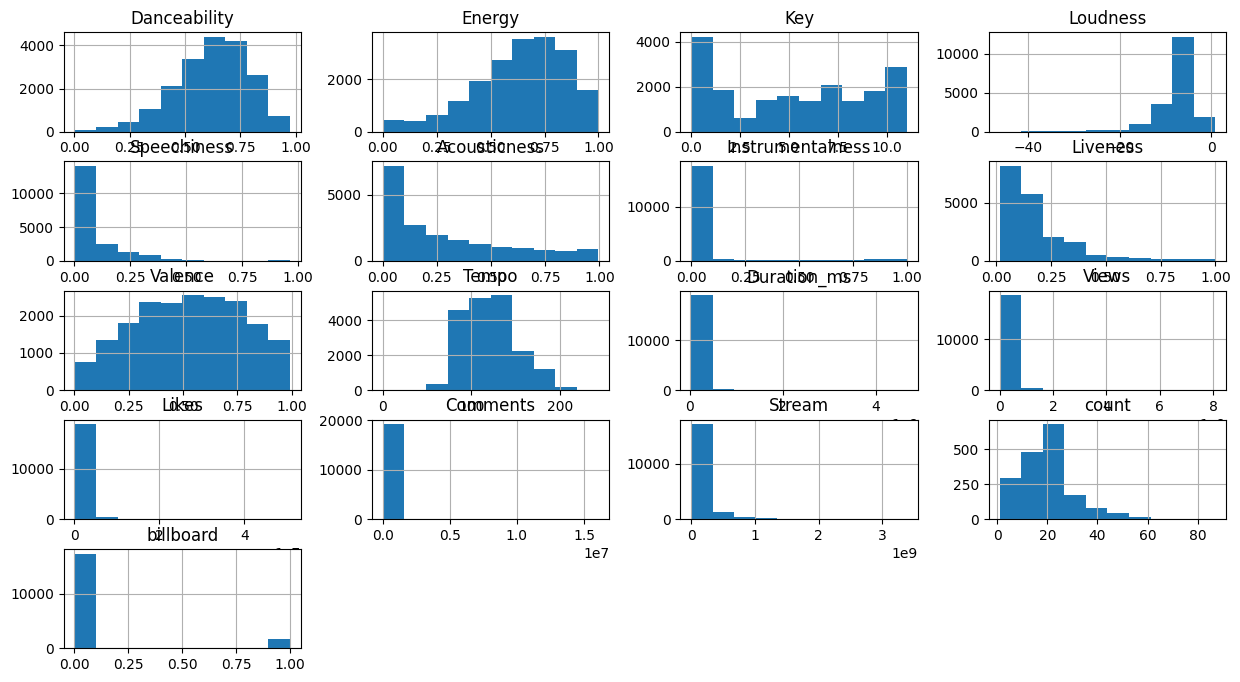

In [ ]:
merged_df.hist(figsize = (15,8)) #

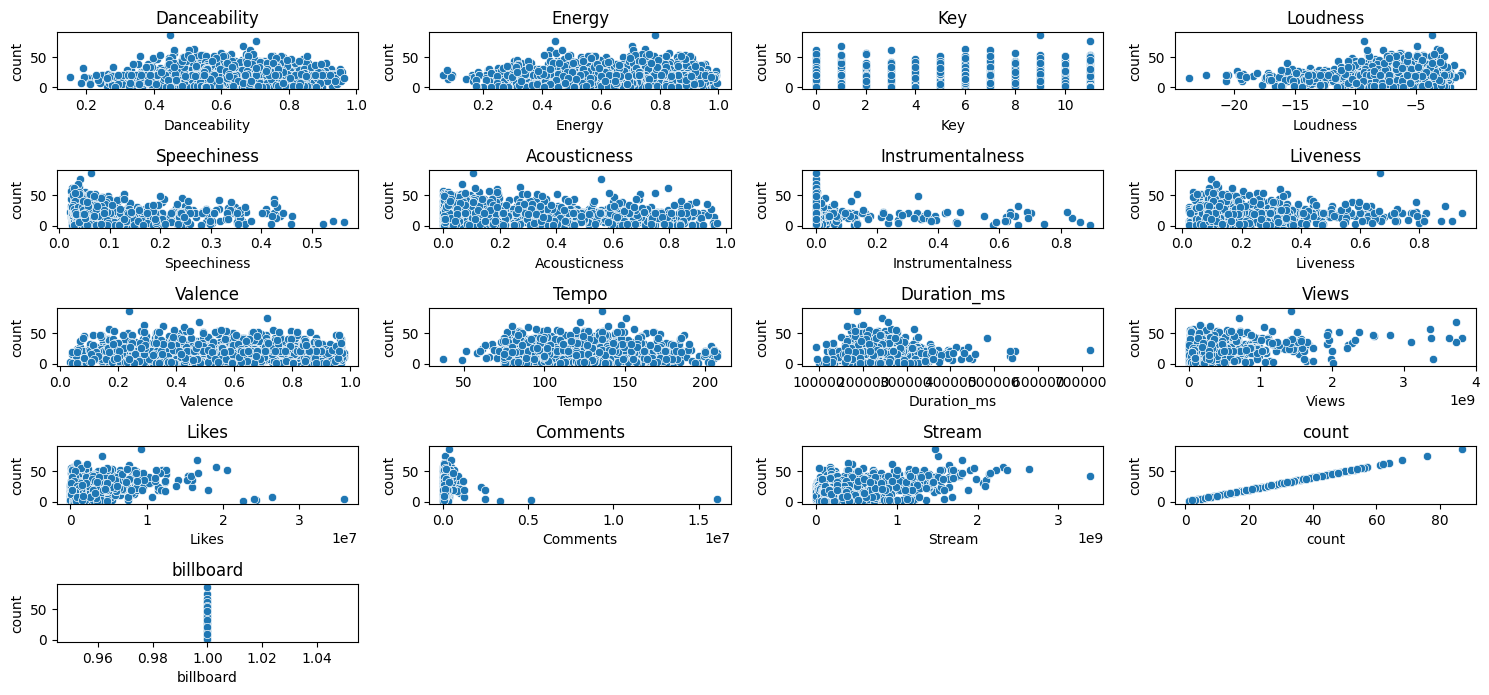

In [14]:
# plot relationship between number of times enter billboard and other variables
plt.figure(figsize=(15,8))

nrows = 6
ncols = 4
iterator = 1
num_list = merged_df.select_dtypes(include=np.number).columns

for i in num_list:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x = merged_df.loc[:,i],y=merged_df['count'])
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

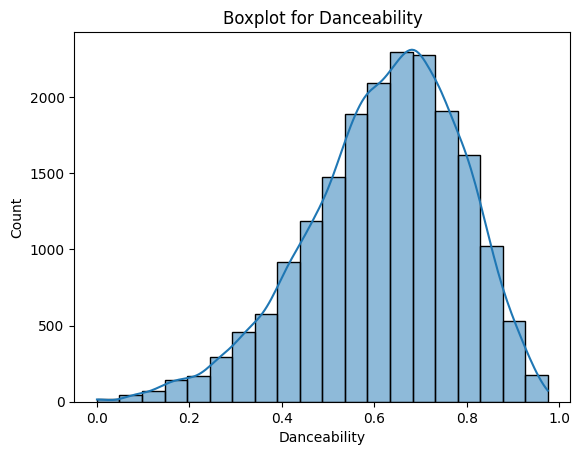

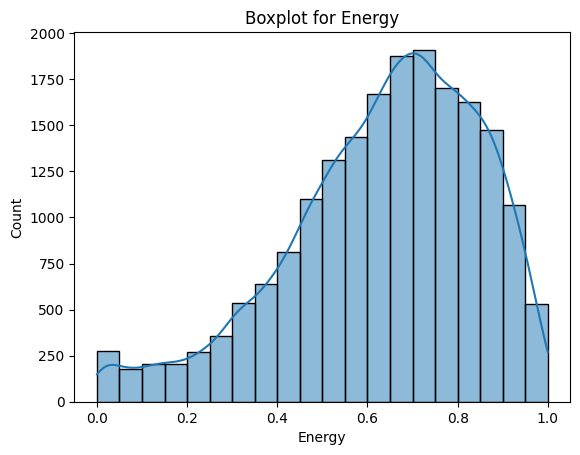

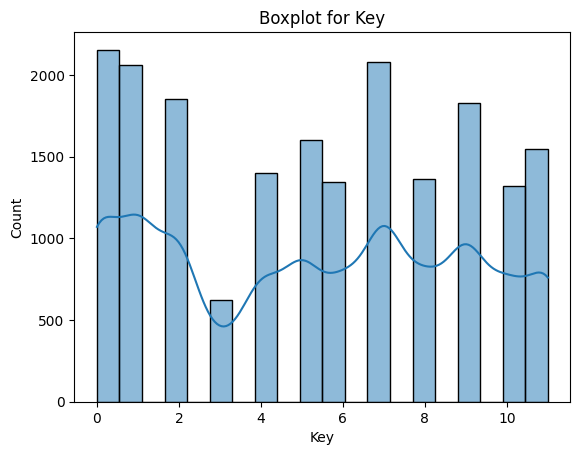

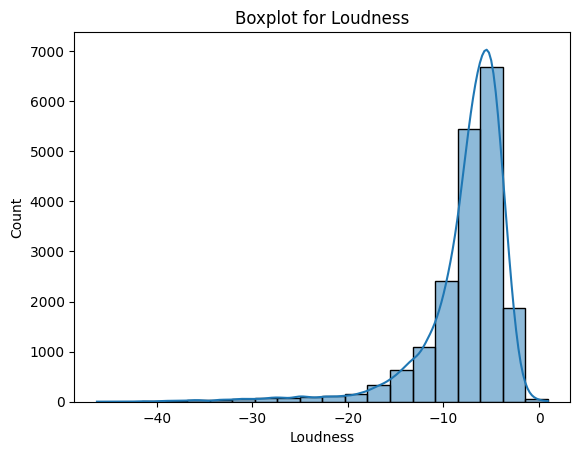

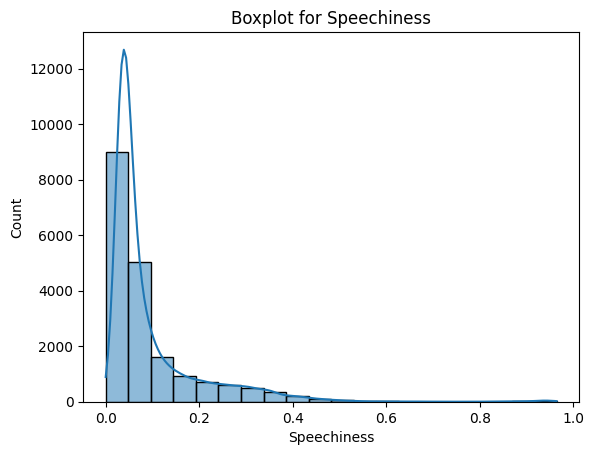

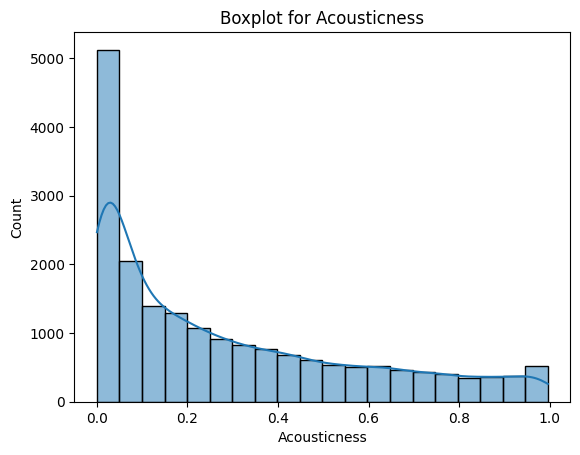

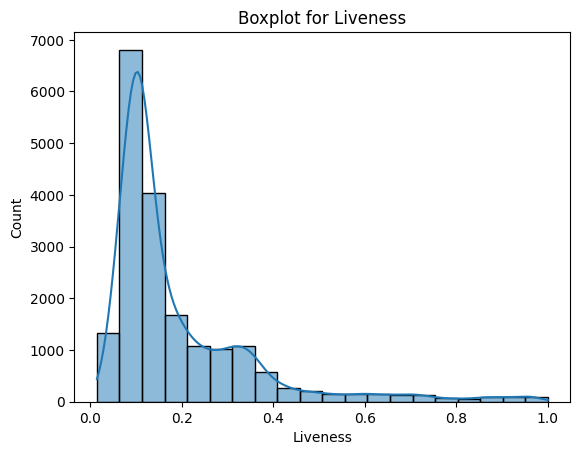

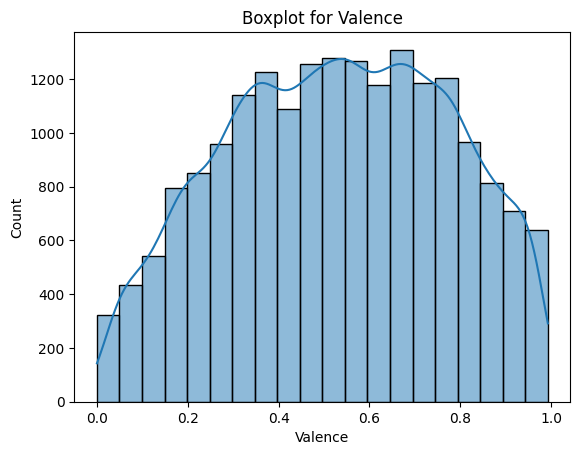

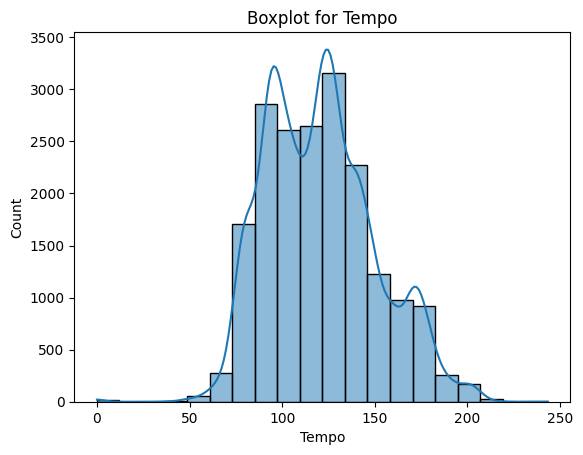

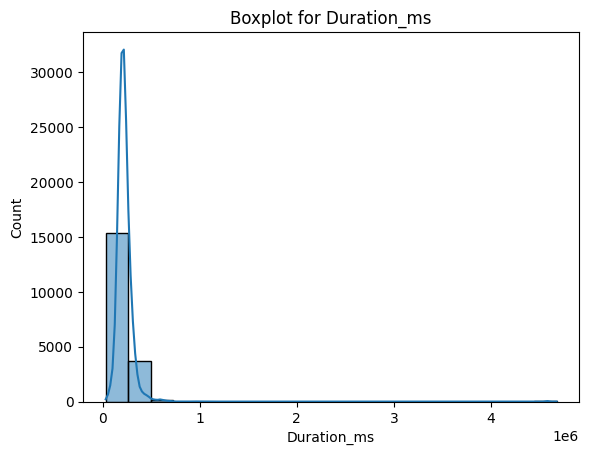

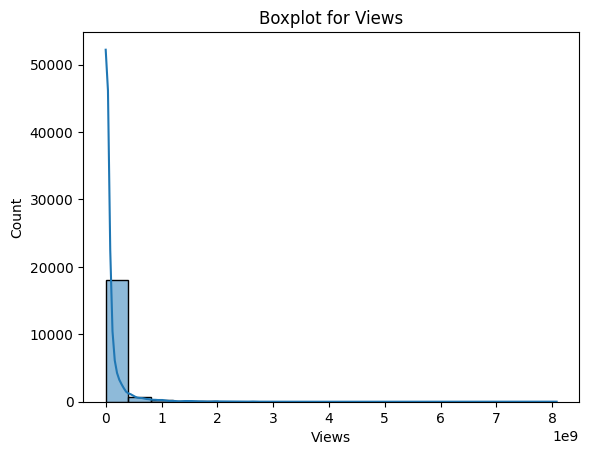

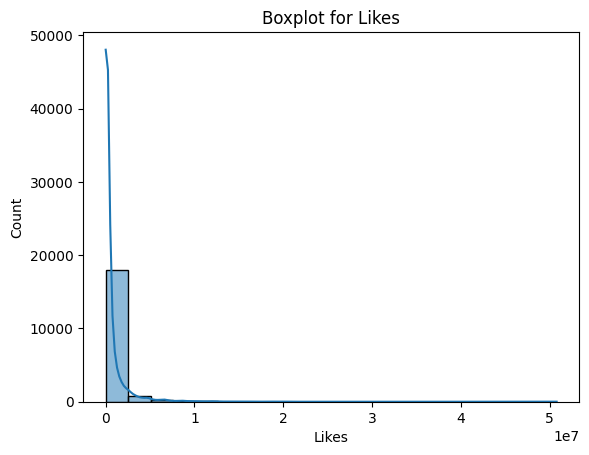

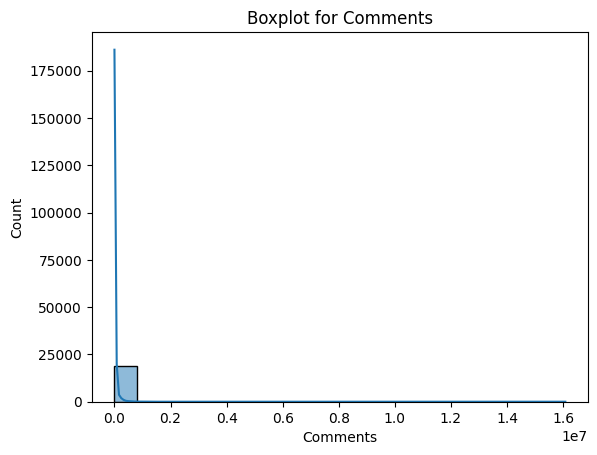

In [15]:
num_cols= ['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Liveness','Valence','Tempo','Duration_ms','Views','Likes','Comments']
for i in num_cols:
    sns.histplot(merged_df[i],kde=True,bins=20)
    plt.title(f"Boxplot for {i}")
    plt.show()

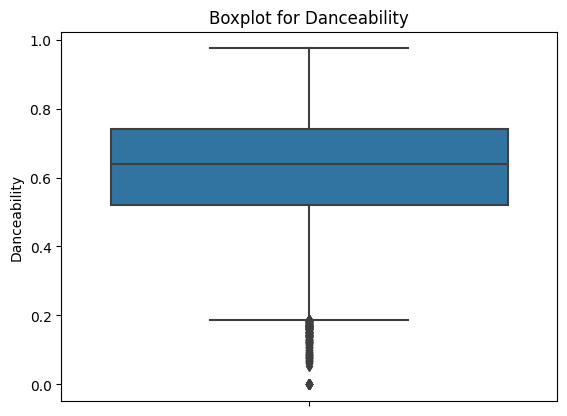

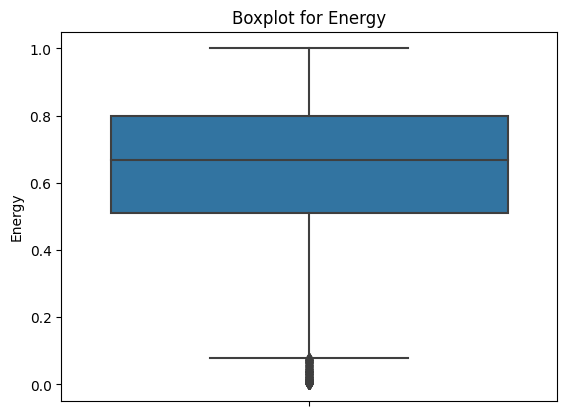

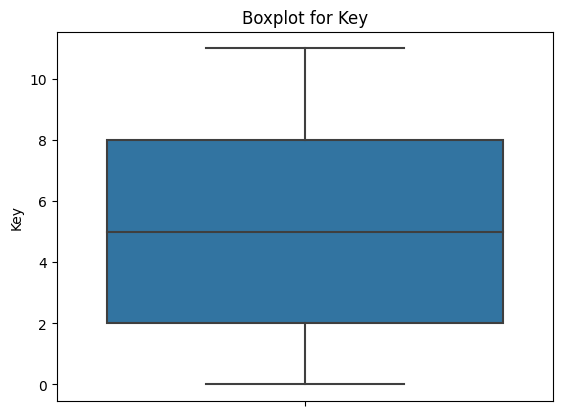

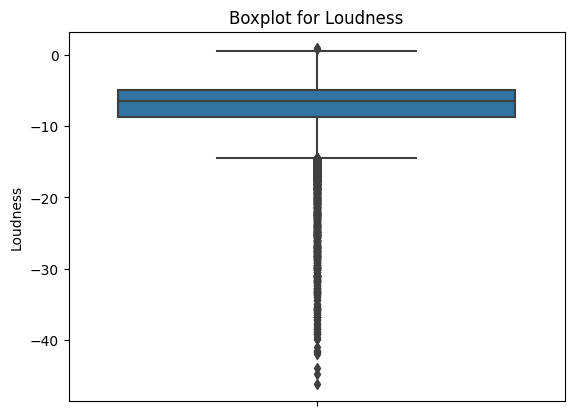

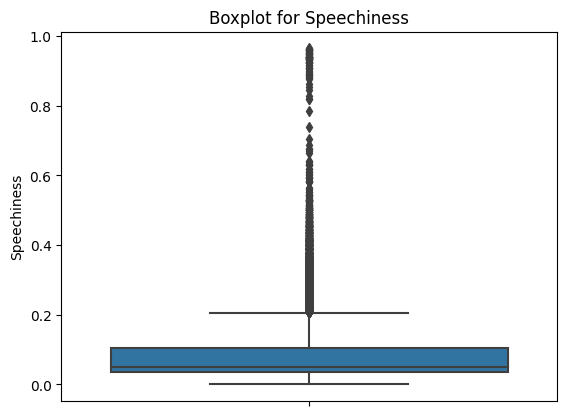

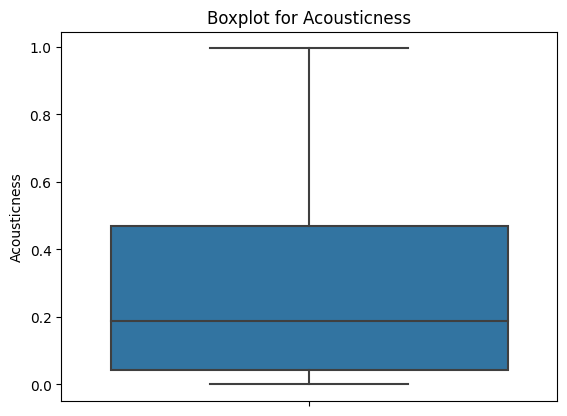

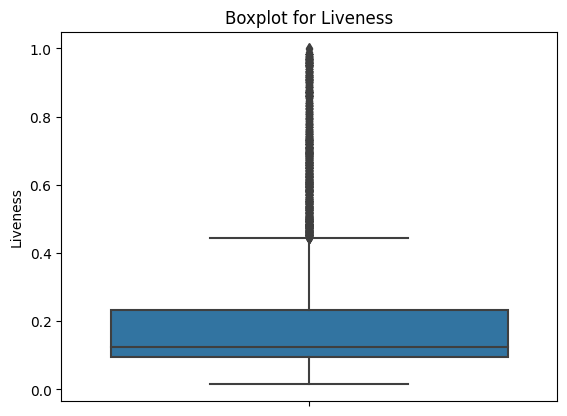

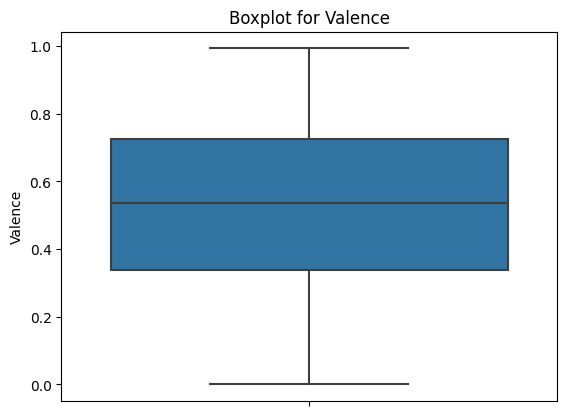

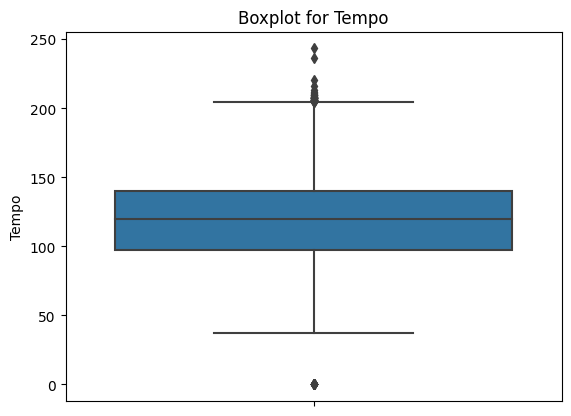

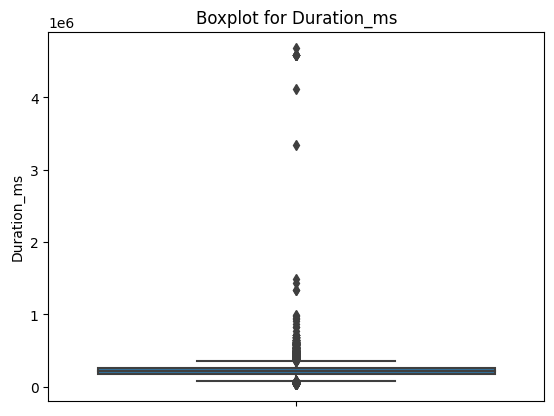

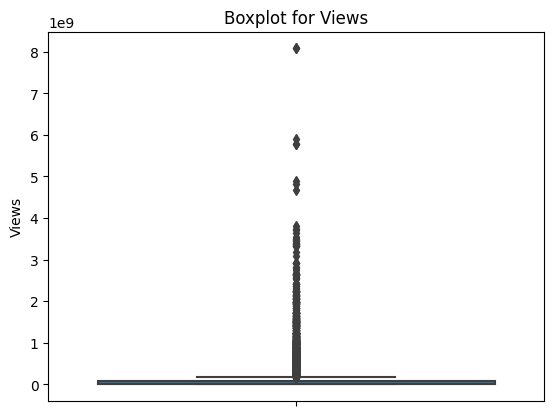

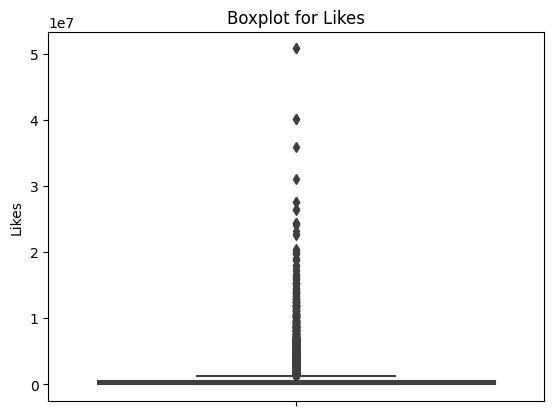

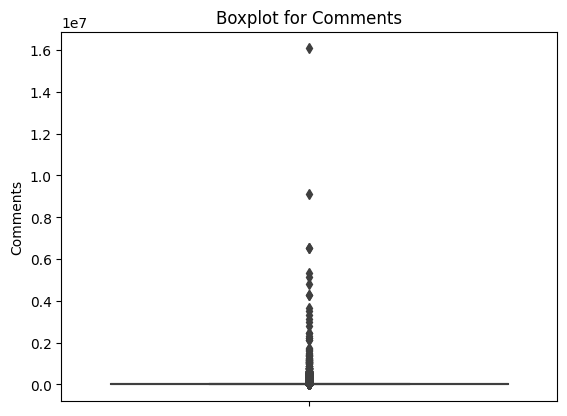

In [16]:
num_cols= ['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Liveness','Valence','Tempo','Duration_ms','Views','Likes','Comments']
for i in num_cols:
    sns.boxplot(data= merged_df,y=merged_df[i])
    plt.title(f"Boxplot for {i}")
    plt.show()

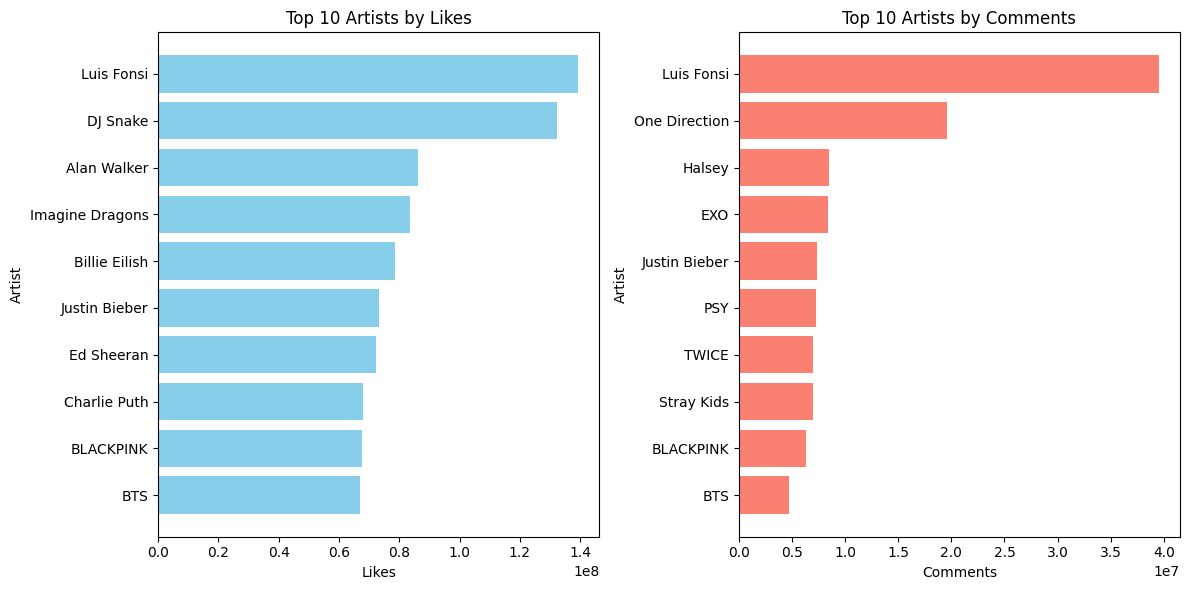

In [17]:
merged_df_grouped = merged_df.groupby('Artist')[['Likes', 'Comments']].sum().reset_index()

top_likes = merged_df_grouped.sort_values(by='Likes', ascending=False).head(10)

top_comments = merged_df_grouped.sort_values(by='Comments', ascending=False).head(10)

# Plot the top 10 artists by Likes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_likes['Artist'], top_likes['Likes'][::-1], color='skyblue')  # Reverse the order
plt.title('Top 10 Artists by Likes')
plt.xlabel('Likes')
plt.ylabel('Artist')

# Plot the top 10 artists by Comments
plt.subplot(1, 2, 2)
plt.barh(top_comments['Artist'], top_comments['Comments'][::-1], color='salmon')  # Reverse the order
plt.title('Top 10 Artists by Comments')
plt.xlabel('Comments')
plt.ylabel('Artist')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

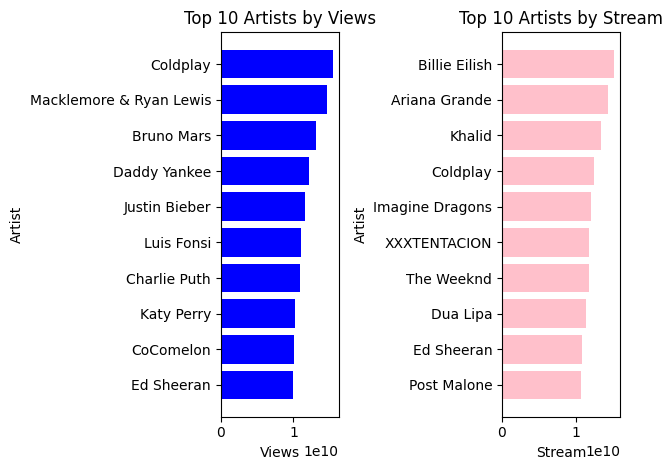

In [18]:
merged_df_grouped = merged_df.groupby('Artist')[['Views', 'Stream']].sum().reset_index()

top_views = merged_df_grouped.sort_values(by='Views', ascending=False).head(10)

top_stream = merged_df_grouped.sort_values(by='Stream', ascending=False).head(10)

# Plot the top 10 artists by Views
plt.subplot(1, 2, 1)
plt.barh(top_views['Artist'], top_views['Views'][::-1], color='blue')
plt.title('Top 10 Artists by Views')
plt.xlabel('Views')
plt.ylabel('Artist')

# Plot the top 10 artists by Stream
plt.subplot(1, 2, 2)
plt.barh(top_stream['Artist'], top_stream['Stream'][::-1], color='pink')
plt.title('Top 10 Artists by Stream')
plt.xlabel('Stream')
plt.ylabel('Artist')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

look at correlations of the the data

In [19]:
# check correlations
merged_df.corr()

<ipython-input-19-fce5c75d7f21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,count,billboard
Danceability,1.000000,0.237308,0.040010,0.358489,0.227250,-0.280314,-0.322392,-0.081334,0.464737,-0.063116,-0.090393,0.089105,0.099296,0.043748,0.072299,0.087217,-0.028580
Energy,0.237308,1.000000,0.032441,0.745109,0.091493,-0.661459,-0.316586,0.174765,0.391466,0.156221,0.022895,0.066530,0.061980,0.045151,0.044376,0.008983,0.034082
Key,0.040010,0.032441,1.000000,0.028907,0.022568,-0.031197,-0.000131,-0.007418,0.044923,0.000744,0.003057,0.009293,0.007948,0.007949,-0.006250,0.006285,-0.008933
Loudness,0.358489,0.745109,0.028907,1.000000,0.070431,-0.552748,-0.557273,0.086952,0.316783,0.143877,0.010756,0.118406,0.123731,0.059282,0.118746,0.121104,0.019265
Speechiness,0.227250,0.091493,0.022568,0.070431,1.000000,-0.099049,-0.112720,0.065696,0.061185,0.051544,-0.049266,-0.008672,0.014429,0.010993,-0.015688,-0.066231,-0.079617
Acousticness,-0.280314,-0.661459,-0.031197,-0.552748,-0.099049,1.000000,0.283356,-0.053317,-0.205586,-0.129236,-0.023606,-0.069905,-0.078123,-0.052988,-0.104716,-0.101061,-0.081323
Instrumentalness,-0.322392,-0.316586,-0.000131,-0.557273,-0.112720,0.283356,1.000000,-0.057004,-0.269038,-0.081878,-0.006245,-0.080820,-0.081171,-0.032473,-0.092336,-0.092856,-0.064229
Liveness,-0.081334,0.174765,-0.007418,0.086952,0.065696,-0.053317,-0.057004,1.000000,0.033008,0.008357,-0.000594,-0.017140,-0.023562,-0.013107,-0.037141,-0.047327,-0.026999
Valence,0.464737,0.391466,0.044923,0.316783,0.061185,-0.205586,-0.269038,0.033008,1.000000,0.091131,-0.050988,0.038699,0.013986,0.018601,-0.011480,-0.037564,0.025883
Tempo,-0.063116,0.156221,0.000744,0.143877,0.051544,-0.129236,-0.081878,0.008357,0.091131,1.000000,-0.014836,-0.001373,0.002287,0.008085,0.002584,-0.041880,0.003297


<ipython-input-20-4aa3746ddb66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot = True, cmap="YlGnBu") # Yellow Green Blue


<Axes: >

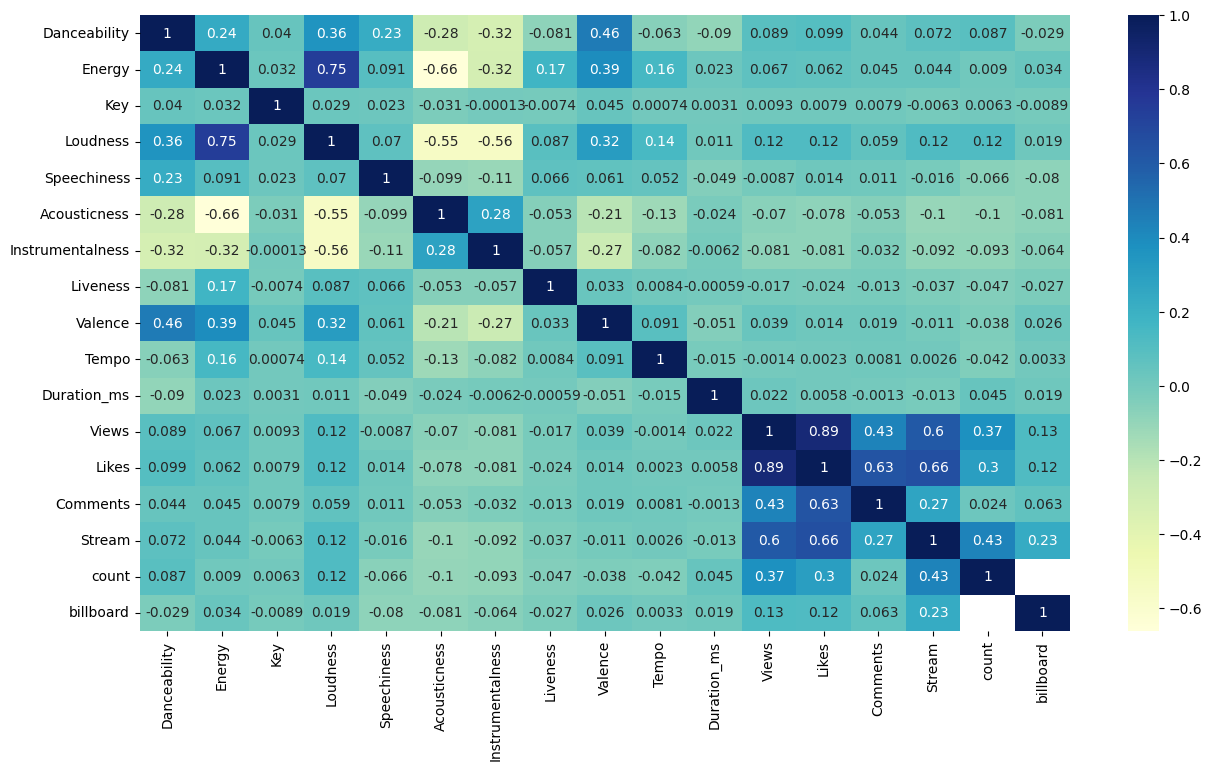

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(merged_df.corr(), annot = True, cmap="YlGnBu") # Yellow Green Blue

Note that Stream does not have high corelation with billboard, meaning no high linear correlations.

Likes,Views and Comments are highly correlated, so we should work around that by creating features like like/view ratios and comment/view ratios.

Youtube Likes, views, and comments are very correlated with the dependent variable.

<Axes: >

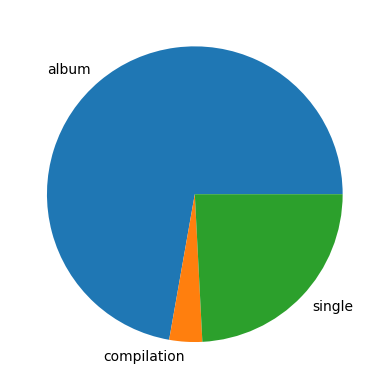

In [21]:
merged_df.groupby('Album_type').size().plot.pie()

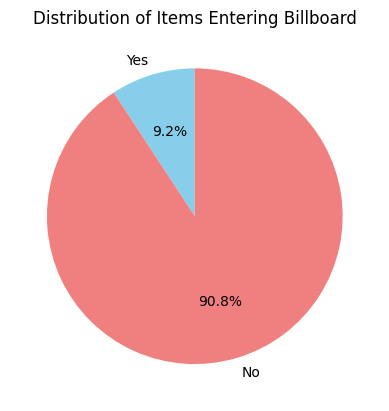

In [22]:
# Example data
enter_billboard_counts = {'Yes': 1772, 'No': 17398}

# Plotting
fig, ax = plt.subplots()

# Create a pie chart with labels and percentages
ax.pie(enter_billboard_counts.values(), labels=enter_billboard_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Set a title
plt.title('Distribution of Items Entering Billboard')

# Show the plot
plt.show()

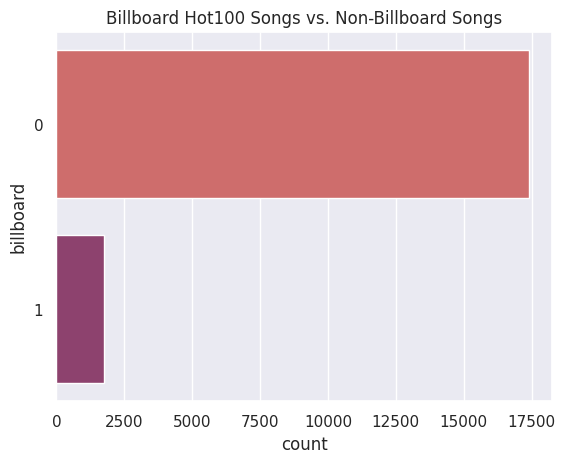

In [23]:
sns.set_theme(style="darkgrid")
sns.countplot(y="billboard", data=merged_df, palette="flare").set(title='Billboard Hot100 Songs vs. Non-Billboard Songs')
plt.show()

In [24]:
unique, counts = np.unique(merged_df['billboard'], return_counts=True)
print("about {} % of the songs in the original df were in the billboard".format(round(100* counts[1] / (counts[0] + counts[1]),2)))

about 9.24 % of the songs in the original df were in the billboard


Top 10 artists with highest views on Youtube

In [25]:
top_artists = merged_df.groupby('Artist').mean().sort_values(by='Views',ascending=False).head(10)
top_artists

<ipython-input-25-ada7f8036bf5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_artists = merged_df.groupby('Artist').mean().sort_values(by='Views',ascending=False).head(10)


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,count,billboard
Artist,,,,,,,,,,,,,,,,,
Ed Sheeran,0.713600,0.608900,4.700000,-5.526400,0.057440,0.308300,0.000065,0.172810,0.566000,105.693000,225800.200000,1.546021e+09,8.354332e+06,252082.200000,1.439488e+09,29.666667,0.300000
CoComelon,0.731700,0.400200,3.800000,-10.833400,0.042910,0.529600,0.000017,0.117090,0.823800,158.861900,146435.600000,1.460167e+09,4.171391e+06,0.000000,3.690822e+07,NaN,0.000000
Katy Perry,0.681800,0.765500,5.300000,-4.586000,0.052100,0.041185,0.000004,0.253630,0.601400,122.605600,215887.000000,1.312063e+09,6.306709e+06,315326.700000,6.607329e+08,28.400000,0.500000
Justin Bieber,0.651000,0.625000,3.444444,-6.516111,0.068267,0.321678,0.000161,0.221611,0.566444,126.150889,186853.555556,1.221199e+09,8.731025e+06,806551.888889,1.124656e+09,27.666667,0.333333
Charlie Puth,0.743400,0.565000,4.200000,-6.187700,0.085330,0.381210,0.008600,0.110100,0.610900,109.925400,193943.400000,1.216759e+09,8.633692e+06,372379.600000,7.041187e+08,30.000000,0.300000
Daddy Yankee,0.780111,0.811444,3.888889,-4.819778,0.072933,0.124800,0.000022,0.136122,0.671667,104.340556,203115.444444,1.207587e+09,7.276161e+06,518939.222222,5.486072e+08,20.000000,0.111111
Luis Fonsi,0.644600,0.741700,4.000000,-5.148200,0.077950,0.314690,0.000042,0.183040,0.644800,128.149900,214262.300000,1.162811e+09,6.690849e+06,470342.800000,5.054326e+08,9.000000,0.100000
Bruno Mars,0.715000,0.629556,2.888889,-6.275667,0.046933,0.163156,0.000008,0.175700,0.657667,113.713889,215656.111111,1.136871e+09,6.609977e+06,213325.111111,1.107037e+09,37.400000,0.555556
Macklemore & Ryan Lewis,0.653800,0.669900,4.900000,-6.233000,0.158990,0.223420,0.000015,0.213970,0.508330,102.145100,279002.900000,1.012206e+09,6.604141e+06,242519.000000,3.982978e+08,NaN,0.000000


Top 10 songs with highest stream on Spotify

In [26]:
top_songs = merged_df.groupby('Track').mean().sort_values(by='Stream',ascending=False).head(10)
top_songs

<ipython-input-26-1e56b50cf299>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_songs = merged_df.groupby('Track').mean().sort_values(by='Stream',ascending=False).head(10)


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,count,billboard
Track,,,,,,,,,,,,,,,,,
Blinding Lights,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,6.741645e+08,8817927.0,282589.0,3.386520e+09,42.0,1.0
Shape of You,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,5.908398e+09,31047780.0,1130327.0,3.362005e+09,NaN,0.0
Someone You Loved,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161.0,5.867684e+08,7367091.0,147565.0,2.634013e+09,54.0,1.0
rockstar (feat. 21 Savage),0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147.0,1.060220e+09,12564657.0,366520.0,2.594927e+09,NaN,0.0
Sunflower - Spider-Man: Into the Spider-Verse,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560.0,1.977389e+09,13749809.5,331063.5,2.538330e+09,NaN,0.0
One Dance,0.792,0.625,1.0,-5.609,0.0536,0.00776,0.001800,0.3290,0.370,103.967,173987.0,1.692883e+08,1662640.0,13775.0,2.522432e+09,NaN,0.0
STAY (with Justin Bieber),0.591,0.764,1.0,-5.484,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806.0,6.812085e+08,10131410.5,247007.0,2.365778e+09,NaN,0.0
Señorita,0.759,0.548,9.0,-6.049,0.0290,0.03920,0.000000,0.0828,0.749,116.967,190800.0,1.487650e+09,19846118.0,640320.0,2.336220e+09,NaN,0.0
Heat Waves,0.761,0.525,11.0,-6.900,0.0944,0.44000,0.000007,0.0921,0.531,80.870,238805.0,4.800890e+08,7145914.0,140345.0,2.261464e+09,NaN,0.0


Songs that stay the longest in billboard

In [27]:
top_songs = merged_df.groupby('Track').sum().sort_values(by=['count', 'Stream'],ascending=False).head(10)
top_songs[['count', 'Stream']]

<ipython-input-27-6d3eab66f681>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_songs = merged_df.groupby('Track').sum().sort_values(by=['count', 'Stream'],ascending=False).head(10)


,count,Stream
Track,,
Perfect,98.0,3.239169e+09
Radioactive,87.0,1.573720e+09
Again,81.0,6.217827e+08
Photograph,80.0,2.514385e+09
Red Red Wine,80.0,5.372599e+08
I'm Yours,76.0,1.614676e+09
Breathe,73.0,2.913840e+08
Without Me,72.0,3.124345e+09
Counting Stars,68.0,1.805320e+09


Artists that have songs staying the longest in billboard

In [28]:
top_artists = merged_df.groupby('Artist').sum().sort_values(by=['count', 'Stream'],ascending=False).head(10)
top_artists[['count', 'Stream', 'Likes', 'Views']]

<ipython-input-28-a4a75c27276d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_artists = merged_df.groupby('Artist').sum().sort_values(by=['count', 'Stream'],ascending=False).head(10)


,count,Stream,Likes,Views
Artist,,,,
Imagine Dragons,315.0,1.185831e+10,72274477.0,9.093785e+09
3 Doors Down,265.0,1.687698e+09,7034633.0,1.527164e+09
Nickelback,264.0,2.668944e+09,5804092.0,1.049882e+09
TLC,228.0,1.442637e+09,5937417.0,9.798742e+08
Maroon 5,223.0,1.072251e+10,45510315.0,8.311252e+09
Bon Jovi,200.0,4.171729e+09,19870296.0,4.423105e+09
Lifehouse,199.0,9.211847e+08,1983335.0,3.500086e+08
Commodores,192.0,8.278566e+08,916957.0,1.609659e+08
Bruno Mars,187.0,9.963335e+09,59489790.0,1.023184e+10


# Baseline Models

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19170 entries, 0 to 19169
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Url_spotify       19170 non-null  object 
 2   Track             19170 non-null  object 
 3   Album             19170 non-null  object 
 4   Album_type        19170 non-null  object 
 5   Uri               19170 non-null  object 
 6   Danceability      19170 non-null  float64
 7   Energy            19170 non-null  float64
 8   Key               19170 non-null  float64
 9   Loudness          19170 non-null  float64
 10  Speechiness       19170 non-null  float64
 11  Acousticness      19170 non-null  float64
 12  Instrumentalness  19170 non-null  float64
 13  Liveness          19170 non-null  float64
 14  Valence           19170 non-null  float64
 15  Tempo             19170 non-null  float64
 16  Duration_ms       19170 non-null  float6

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
x = merged_df.iloc[:,6:17]
y = merged_df['billboard']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1234)
print('Training set:', x_train.shape, 'Testing set:', x_test.shape)

Training set: (15336, 11) Testing set: (3834, 11)


In [37]:
x

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0
...,...,...,...,...,...,...,...,...,...,...,...
19165,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0
19166,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0
19167,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0
19168,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0


## Logistic Regression

In [38]:
# logistic regression
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

# Use Logistic Regression function to fit the data
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [39]:
# Run class y predictions
y_lrpred = lr.predict(x_test)

# Extract regressed probabilities using predict_proba
p_pred=lr.predict_proba(x_test)[:,1]
np.round(p_pred,3)

array([0.093, 0.185, 0.064, ..., 0.1  , 0.165, 0.124])

In [40]:
# find the best cutoff value and accuracy score
for c in [0.1,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    p_pred_new=[1 if i > c else 0 for i in p_pred]
    print('Cutoff value:',c,'Accuracy Score:', accuracy_score(y_test, p_pred_new))

Cutoff value: 0.1 Accuracy Score: 0.5080855503390714
Cutoff value: 0.2 Accuracy Score: 0.8972352634324465
Cutoff value: 0.3 Accuracy Score: 0.9040166927490871
Cutoff value: 0.4 Accuracy Score: 0.9040166927490871
Cutoff value: 0.5 Accuracy Score: 0.9047991653625457
Cutoff value: 0.6 Accuracy Score: 0.9047991653625457
Cutoff value: 0.7 Accuracy Score: 0.9047991653625457
Cutoff value: 0.8 Accuracy Score: 0.9047991653625457
Cutoff value: 0.9 Accuracy Score: 0.9047991653625457


[[3469    0]
 [ 365    0]]
0.9047991653625457
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3469
           1       0.00      0.00      0.00       365

    accuracy                           0.90      3834
   macro avg       0.45      0.50      0.48      3834
weighted avg       0.82      0.90      0.86      3834

      0  1
0  3469  0
1   365  0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


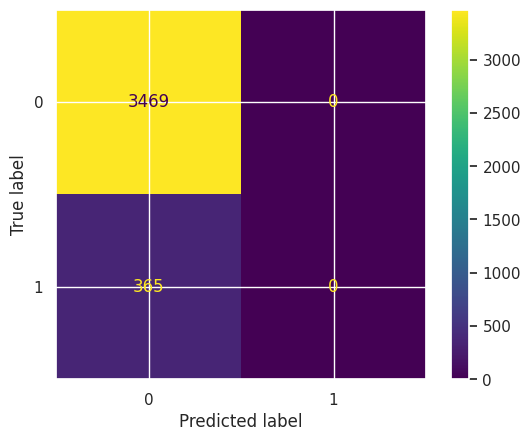

In [41]:
print(confusion_matrix(y_test,y_lrpred))
print(accuracy_score(y_test, y_lrpred))
print(classification_report(y_test,y_lrpred))

print(pd.DataFrame(confusion_matrix(y_test,y_lrpred)))
cm_logistic = confusion_matrix(y_test, y_lrpred, labels=lr.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,display_labels=lr.classes_)
disp.plot()
plt.show()

In [43]:
columnsnames = x.columns
columnsnames

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms'],
      dtype='object')

In [44]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef},index=columnsnames))

intercept  -0.00011782297919114826
                     coeff
Danceability     -0.000086
Energy           -0.000055
Key              -0.000692
Loudness          0.001252
Speechiness      -0.000030
Acousticness     -0.000083
Instrumentalness -0.000036
Liveness         -0.000030
Valence          -0.000053
Tempo            -0.013949
Duration_ms      -0.000003


Text(0.5, 0, 'Importance')

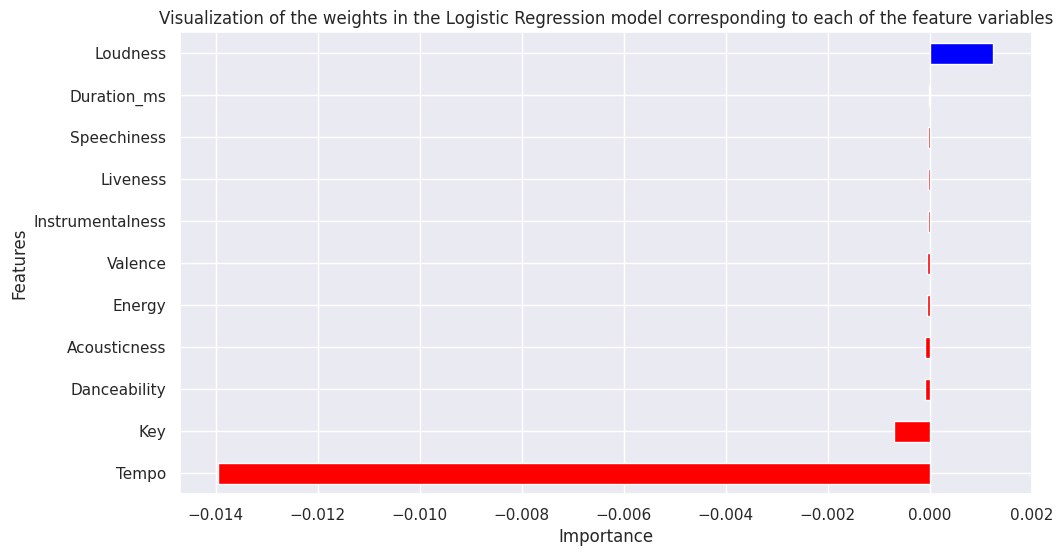

In [45]:
# To see the weights of each original coefficients in the Logistic Regression model corresponding to each of the feature variables
features = pd.DataFrame()
features['Features'] = columnsnames
features['importance'] = lr_coef
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),title= 'Visualization of the weights in the Logistic Regression model corresponding to each of the feature variables', color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## KNN

[[3469    0]
 [ 365    0]]
0.9047991653625457
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3469
           1       0.00      0.00      0.00       365

    accuracy                           0.90      3834
   macro avg       0.45      0.50      0.48      3834
weighted avg       0.82      0.90      0.86      3834

      0  1
0  3469  0
1   365  0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


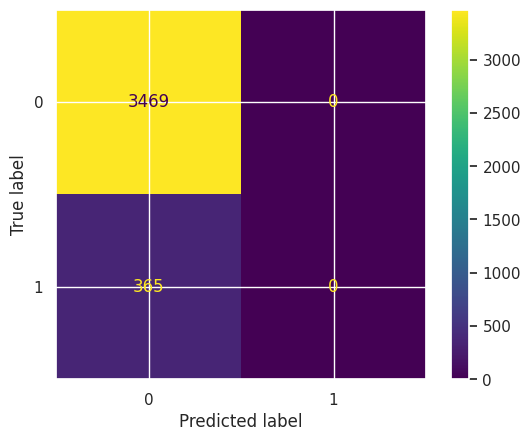

In [46]:
# Standardize training and validation features using 'StandatdScaler()'
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 27, metric = "euclidean")
knn.fit(x_train_scaled, y_train)
knn_predict = knn.predict(x_test_scaled)

print(confusion_matrix(y_test,knn_predict))
print(accuracy_score(y_test, knn_predict))
print(classification_report(y_test,knn_predict))

print(pd.DataFrame(confusion_matrix(y_test,knn_predict)))
cm_knn = confusion_matrix(y_test, knn_predict, labels=knn.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn.classes_)
disp.plot()
plt.show()

## Decision Tree


In [ ]:
# prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_dt = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_dt = model_dt.predict(x_test)
print(classification_report(y_test, y_pred_dt))

from sklearn.metrics import accuracy_score
Music_TreeAcc=accuracy_score(y_pred_dt,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(Music_TreeAcc*100))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3494
           1       0.00      0.00      0.00       340

    accuracy                           0.91      3834
   macro avg       0.46      0.50      0.48      3834
weighted avg       0.83      0.91      0.87      3834

Decision Tree accuracy is: 91.13%


/Users/szy/anaconda3/envs/notebook-6.5.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/szy/anaconda3/envs/notebook-6.5.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/szy/anaconda3/envs/notebook-6.5.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

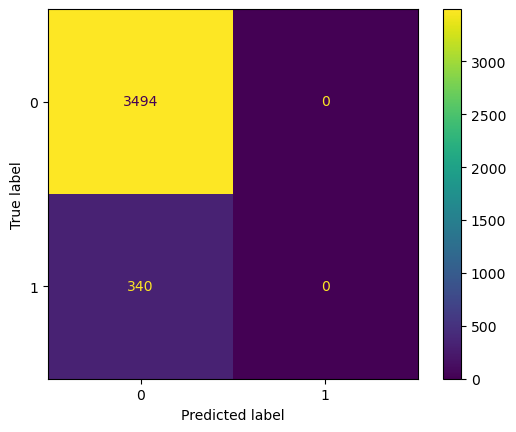

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=model_dt.classes_)
disp.plot()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model_rf.fit(x_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=10)

In [ ]:
model_rf.score(x_test,y_test)

0.9087115284298383

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_rf.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[3481,   13],
       [ 337,    3]])

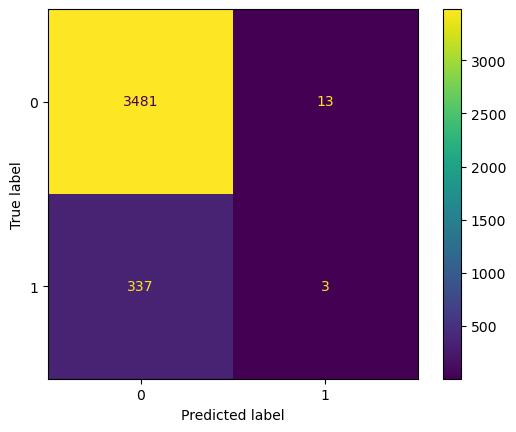

In [ ]:
cm_tree2 = confusion_matrix(y_test, y_pred, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree2,display_labels=model_rf.classes_)
disp.plot()
plt.show()

## Neural Network

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state = 1234, max_iter = 10000,solver = 'sgd', hidden_layer_sizes=(5,5))
nn.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred_nn = nn.predict(x_test_scaled)
print(classification_report(y_test, y_pred_nn))

from sklearn.metrics import accuracy_score
Music_TreeAcc_nn=accuracy_score(y_pred_nn,y_test)
print('Neural Network accuracy is: {:.2f}%'.format(Music_TreeAcc*100))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3494
           1       0.00      0.00      0.00       340

    accuracy                           0.91      3834
   macro avg       0.46      0.50      0.48      3834
weighted avg       0.83      0.91      0.87      3834

Neural Network accuracy is: 91.13%


/Users/szy/anaconda3/envs/notebook-6.5.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/szy/anaconda3/envs/notebook-6.5.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/szy/anaconda3/envs/notebook-6.5.4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

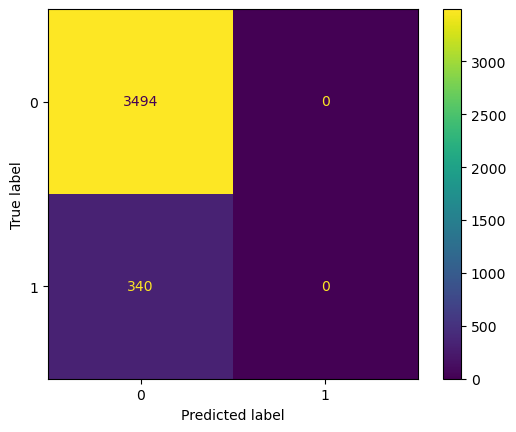

In [ ]:
cm_tree_nn = confusion_matrix(y_test, y_pred_nn, labels=nn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree_nn,display_labels=nn.classes_)
disp.plot()
plt.show()

# Deal with Data Imbalance Problem using Undersampling

In [47]:
# shuffle the data before creating the subsamples

merged_df_classif = merged_df.sample(frac=1)

class_1 = merged_df_classif.loc[merged_df_classif['billboard'] == 1]
class_count_0, class_count_1 = merged_df_classif['billboard'].value_counts()
print("Number of songs not in billboard: {} \nNumber of songs in Billboard {}".format(class_count_0, class_count_1))

Number of songs not in billboard: 17398 
Number of songs in Billboard 1772


In [48]:
class_0 = merged_df_classif.loc[merged_df_classif['billboard'] == 0]
class_0_under = class_0.sample(class_count_1) # randomly sampled
undersampled_df = pd.concat([class_0_under, class_1], axis=0).sample(frac = 1, random_state = 1234)
undersampled_df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count,billboard
11900,J Balvin,https://open.spotify.com/artist/1vyhD5VmyZ7KMf...,QUE PRETENDES,OASIS,album,spotify:track:25ZAibhr3bdlMCLmubZDVt,0.639,0.7910,10.0,-4.443,0.2530,0.0275,0.000,0.3620,0.939,92.603,222347.0,https://www.youtube.com/watch?v=kPc3Pe42bGI,"J Balvin, Bad Bunny - QUE PRETENDES (Official ...",jbalvinVEVO,366833956.0,2316392.0,38538.0,Subscribe to J Balvin's channel here: https://...,True,True,623040836.0,NaN,NaN,NaN,0
3517,Cher,https://open.spotify.com/artist/72OaDtakiy6yFq...,Believe,Believe,album,spotify:track:2goLsvvODILDzeeiT4dAoR,0.652,0.9170,6.0,-6.720,0.0548,0.0082,0.000,0.0509,0.459,132.975,239027.0,https://www.youtube.com/watch?v=nZXRV4MezEw,Cher - Believe [Official Music Video],Cher,280197941.0,1720941.0,47509.0,The official music video for Believe from Cher...,False,True,442534295.0,Believe,Cher,31.0,1
17103,Cheat Codes,https://open.spotify.com/artist/7DMveApC7UnC2N...,One Night Left,One Night in Nashville,album,spotify:track:7rDBfBqk3ZFi10BozUl5o5,0.620,0.6530,6.0,-5.093,0.0448,0.2020,0.000,0.0893,0.357,129.876,207017.0,https://www.youtube.com/watch?v=W1sThB0Vb18,Cheat Codes x Mackenzie Porter One Night Lef...,Cheat Codes,118357.0,3117.0,63.0,SUBSCRIBE TO OUR CHANNEL AND TURN ON NOTIFICAT...,False,True,3378497.0,NaN,NaN,NaN,0
6190,Stephen Cleobury,https://open.spotify.com/artist/0ugRf6ECGBFRCH...,Hark! The Herald Angels Sing,Carols From Cambridge: The Very Best Sacred Ch...,album,spotify:track:7EbalgDmE57IfwVmyMlKPI,0.209,0.0945,7.0,-23.710,0.0469,0.9610,0.137,0.1820,0.103,74.879,184307.0,https://www.youtube.com/watch?v=PWm5Zt6Ql-0,Hark! the herald angels sing (Desc. Stephen Cl...,"Choir of King’s College, Cambridge - Topic",5791.0,51.0,0.0,Provided to YouTube by harmonia mundi\n\nHark!...,True,True,2745500.0,NaN,NaN,NaN,0
6285,Randy Travis,https://open.spotify.com/artist/1pTuR132U5b4Ri...,Three Wooden Crosses,On the Other Hand - All the Number Ones,compilation,spotify:track:1S4fpfX2u0hzFD9vb6FEB6,0.523,0.5010,1.0,-9.276,0.0366,0.4590,0.000,0.0818,0.391,158.179,201267.0,https://www.youtube.com/watch?v=33S5cvl-IyI,"Randy Travis Performs ""Three Wooden Crosses” |...",CMT,42750.0,983.0,166.0,An iconic hit to say the least ❤️ \n\n#CMT #Ra...,True,True,66443019.0,Three Wooden Crosses,Randy Travis,20.0,1


Now we have a balanced dataset

In [49]:
undersampled_df['billboard'].value_counts()

0    1772
1    1772
Name: billboard, dtype: int64

# Models after Undersampling

In [52]:
# train test split using the undersampled dataset
np.random.seed(123)
x = undersampled_df.iloc[:,6:17]
y = undersampled_df['billboard']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1234)

In [54]:
x.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
11900,0.639,0.7910,10.0,-4.443,0.2530,0.0275,0.000,0.3620,0.939,92.603,222347.0
3517,0.652,0.9170,6.0,-6.720,0.0548,0.0082,0.000,0.0509,0.459,132.975,239027.0
17103,0.620,0.6530,6.0,-5.093,0.0448,0.2020,0.000,0.0893,0.357,129.876,207017.0
6190,0.209,0.0945,7.0,-23.710,0.0469,0.9610,0.137,0.1820,0.103,74.879,184307.0
6285,0.523,0.5010,1.0,-9.276,0.0366,0.4590,0.000,0.0818,0.391,158.179,201267.0


## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
lr_predict = logistic_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       367
           1       0.48      1.00      0.65       342

    accuracy                           0.48       709
   macro avg       0.24      0.50      0.33       709
weighted avg       0.23      0.48      0.31       709



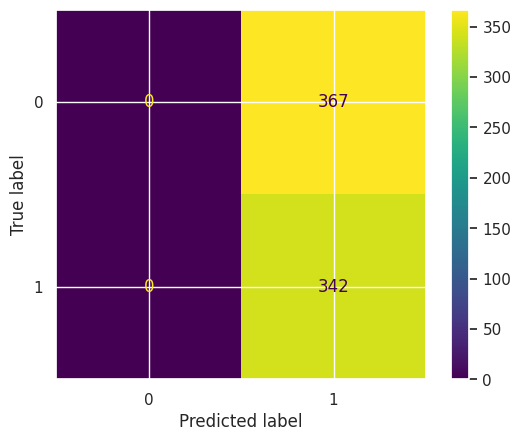

In [56]:
print(classification_report(y_test, lr_predict))
cm_log = confusion_matrix(y_test, lr_predict, labels = logistic_reg.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log,display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)
knn = KNeighborsClassifier(n_neighbors = 27, metric = "euclidean")
knn.fit(x_train_normalized, y_train)
knn_predict = knn.predict(x_test_normalized)

              precision    recall  f1-score   support

           0       0.65      0.51      0.57       367
           1       0.57      0.71      0.63       342

    accuracy                           0.61       709
   macro avg       0.61      0.61      0.60       709
weighted avg       0.61      0.61      0.60       709



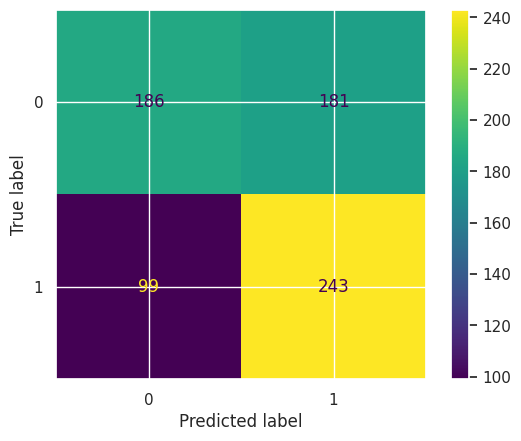

In [58]:
print(classification_report(y_test, knn_predict))
cm_knn = confusion_matrix(y_test, knn_predict, labels = knn.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn.classes_)
disp.plot()
plt.show()

## Decision Tree

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       367
           1       0.59      0.57      0.58       342

    accuracy                           0.60       709
   macro avg       0.60      0.60      0.60       709
weighted avg       0.60      0.60      0.60       709



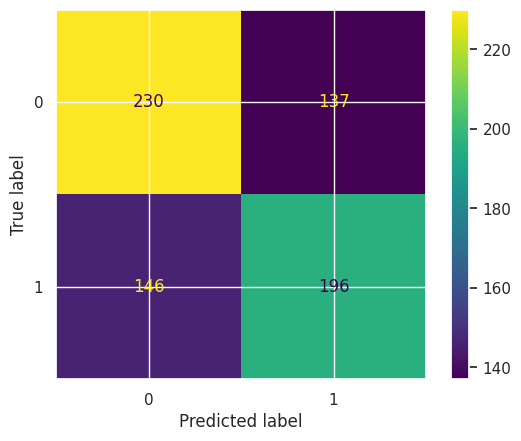

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 50,
                                        min_impurity_decrease = .001,random_state = 1234)
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)
print(classification_report(y_test, dt_predict))
cm_dt = confusion_matrix(y_test, dt_predict, labels = dt.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=dt.classes_)
disp.plot()
plt.show()

The constructed tree has  287 nodes


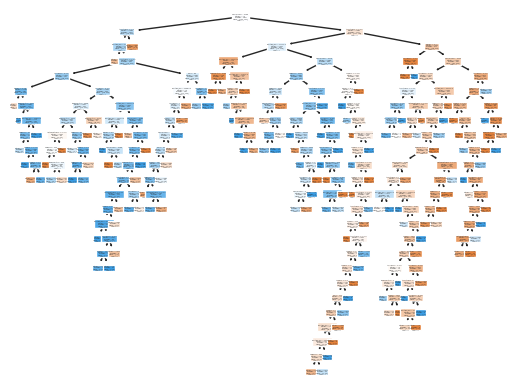

In [61]:
from sklearn import tree
n_nodes = dt.tree_.node_count
print("The constructed tree has ", n_nodes, "nodes")

decision_tree = tree.export_text(dt, feature_names = list(x.columns), show_weights = True)
tree.plot_tree(dt, class_names = ['0', '1'], filled = True, feature_names = list(x.columns))
plt.show()

## Random Forest

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       367
           1       0.64      0.64      0.64       342

    accuracy                           0.65       709
   macro avg       0.65      0.65      0.65       709
weighted avg       0.65      0.65      0.65       709



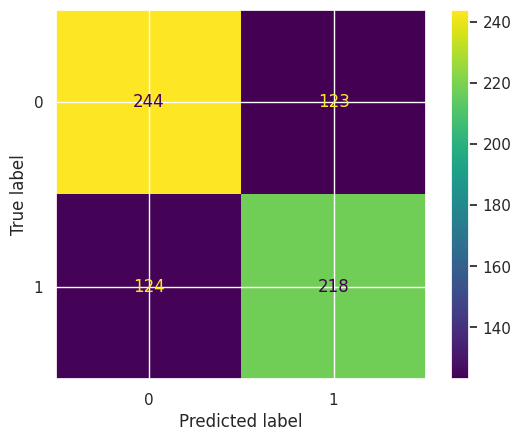

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy", random_state = 1234, oob_score = True)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
print(classification_report(y_test, rf_predict))
cm_rf = confusion_matrix(y_test, rf_predict, labels = rf.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf.classes_)
disp.plot()
plt.show()

## Neural Network

In [63]:
from sklearn.neural_network import MLPClassifier
plainANN = MLPClassifier(random_state = 1234, max_iter = 10000,solver = 'sgd', hidden_layer_sizes=(5,5))
plainANN.fit(x_train_normalized, y_train)
plainANN_results = plainANN.predict(x_test_normalized)

              precision    recall  f1-score   support

           0       0.54      0.43      0.48       367
           1       0.50      0.62      0.55       342

    accuracy                           0.52       709
   macro avg       0.52      0.52      0.51       709
weighted avg       0.52      0.52      0.51       709



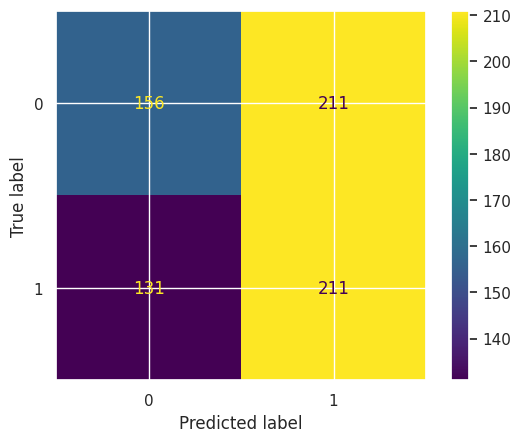

In [64]:
print(classification_report(y_test, plainANN_results))
cm_ann = confusion_matrix(y_test, plainANN_results, labels = plainANN.classes_) # condusion matrix(Test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann,display_labels=plainANN.classes_)
disp.plot()
plt.show()

# Feature Engineering

To further improve the performance of our model, we conducted feature engineering using the three streaming features we did not include in the base models: like, view, and comments. These statistics come from the official music videos of the songs on Youtube. We added two engineered features: like/view ratio and comment/view ratio based on the three statistics.


In [66]:
merged_df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,title,artist,count,billboard
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,NaN,NaN,NaN,0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,NaN,NaN,NaN,0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,NaN,NaN,NaN,0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,NaN,NaN,NaN,0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,Clint Eastwood,Gorillaz,11.0,1


In [67]:
# Like/view Ratio and Comment/view ratio

merged_df['like_view_ratio'] = merged_df['Likes'] / merged_df['Views']
merged_df['cmt_view_ratio'] = merged_df['Comments'] / merged_df['Views']

In [68]:
merged_df_engineered = merged_df.iloc[:,6:17].join(merged_df.iloc[:,20:23]).join(merged_df.iloc[:,[-7,-3,-2,-1]])
merged_df_engineered
# this is the df I will use for classification

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,billboard,like_view_ratio,cmt_view_ratio
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09,0,0.008970,0.000245
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08,0,0.014985,0.000431
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,0,0.033449,0.000877
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08,0,0.008446,0.000261
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08,1,0.010020,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06,0,0.015528,0.000000
19166,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07,0,0.012256,0.000000
19167,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06,0,0.009230,0.000000
19168,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06,0,0.013470,0.000000


<Axes: >

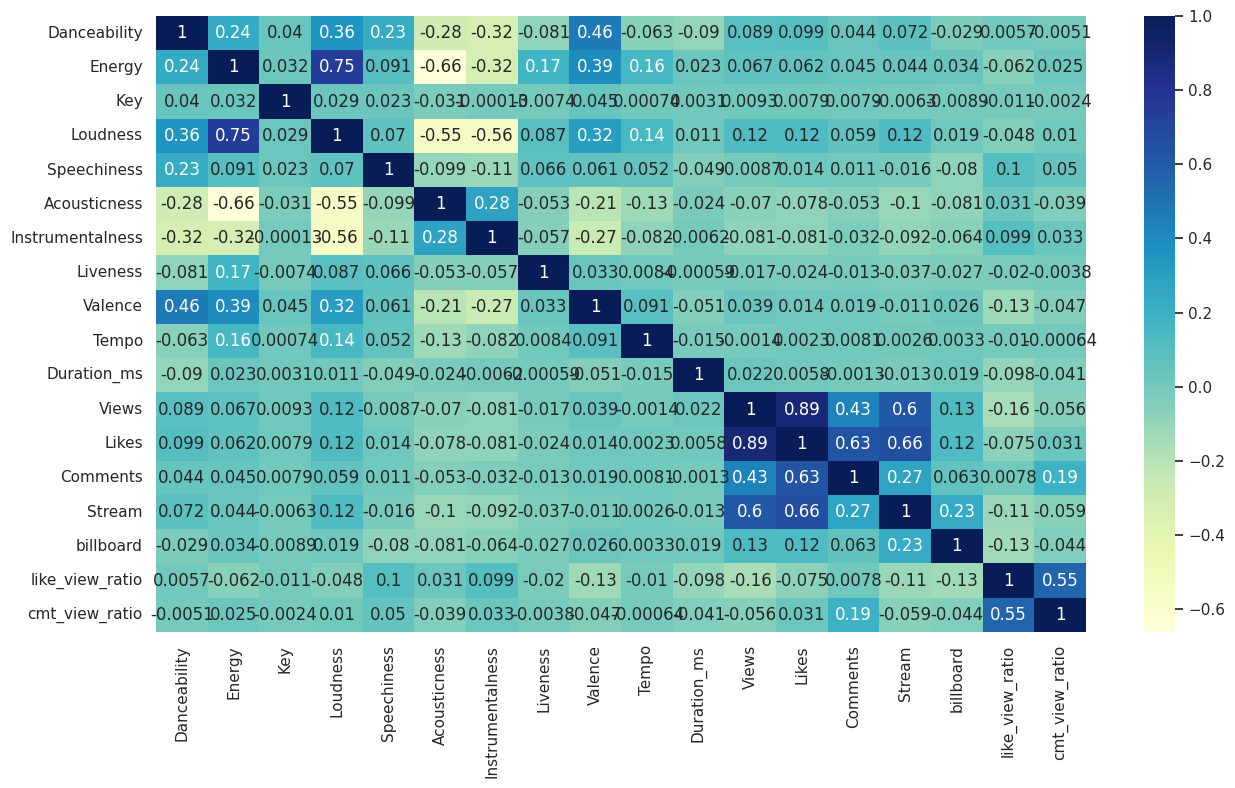

In [69]:
plt.figure(figsize = (15,8))
sns.heatmap(merged_df_engineered.corr(), annot = True, cmap="YlGnBu") # Yellow Green Blue

# Models improved after Feature Engineering

## Undersample and Train Test Split

In [76]:
merged_df_engineered

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,billboard,like_view_ratio,cmt_view_ratio
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09,0,0.008970,0.000245
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08,0,0.014985,0.000431
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07,0,0.033449,0.000877
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08,0,0.008446,0.000261
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08,1,0.010020,0.000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06,0,0.015528,0.000000
19166,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07,0,0.012256,0.000000
19167,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06,0,0.009230,0.000000
19168,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06,0,0.013470,0.000000


In [80]:
from sklearn.utils import resample
class_0 = merged_df_engineered.loc[merged_df_engineered['billboard'] == 0]
class_1 = merged_df_engineered.loc[merged_df_engineered['billboard'] == 1]
class_0_downsampled = resample(class_0, replace = False, n_samples = 1 * len(class_1), random_state = 1234)
undersampled_df = pd.concat([class_0_downsampled, class_1])
undersampled_df.head()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,billboard,like_view_ratio,cmt_view_ratio
3900,0.574,0.619,2.0,-6.741,0.1990,0.20300,0.002150,0.0901,0.473,236.059,159172.0,139648.0,1619.0,41.0,1013601.0,0,0.011593,0.000294
15931,0.634,0.540,8.0,-7.002,0.0777,0.02230,0.000000,0.3020,0.543,143.968,149360.0,253513571.0,2543685.0,87782.0,259222528.0,0,0.010034,0.000346
11533,0.251,0.604,3.0,-5.622,0.0431,0.17100,0.000002,0.1230,0.166,84.643,307846.0,62917907.0,773555.0,13359.0,13047107.0,0,0.012295,0.000212
12060,0.257,0.625,5.0,-5.842,0.0293,0.00014,0.000000,0.0969,0.323,169.022,174146.0,330297.0,16445.0,1201.0,1881711.0,0,0.049789,0.003636
6012,0.715,0.780,2.0,-6.688,0.0327,0.01090,0.001700,0.1190,0.838,115.897,246600.0,645156.0,3479.0,134.0,26359656.0,0,0.005392,0.000208


In [81]:
# train test split
from sklearn.model_selection import train_test_split

np.random.seed(123)
x = undersampled_df.iloc[:,:11].join(undersampled_df.iloc[:,-2:])
y = undersampled_df['billboard']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1234)

In [82]:
x

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,like_view_ratio,cmt_view_ratio
3900,0.574,0.619,2.0,-6.741,0.1990,0.20300,0.002150,0.0901,0.473,236.059,159172.0,0.011593,0.000294
15931,0.634,0.540,8.0,-7.002,0.0777,0.02230,0.000000,0.3020,0.543,143.968,149360.0,0.010034,0.000346
11533,0.251,0.604,3.0,-5.622,0.0431,0.17100,0.000002,0.1230,0.166,84.643,307846.0,0.012295,0.000212
12060,0.257,0.625,5.0,-5.842,0.0293,0.00014,0.000000,0.0969,0.323,169.022,174146.0,0.049789,0.003636
6012,0.715,0.780,2.0,-6.688,0.0327,0.01090,0.001700,0.1190,0.838,115.897,246600.0,0.005392,0.000208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.719,0.538,11.0,-6.897,0.2800,0.63200,0.000000,0.1350,0.803,204.132,117013.0,0.012925,0.000219
18282,0.686,0.561,10.0,-9.929,0.1910,0.18500,0.000000,0.1140,0.186,148.775,116240.0,0.010078,0.000275
18552,0.548,0.805,7.0,-5.732,0.3510,0.21200,0.000389,0.4080,0.648,142.094,216387.0,0.009210,0.000211
18553,0.709,0.548,10.0,-8.493,0.3530,0.65000,0.000002,0.1330,0.543,83.995,160000.0,0.015816,0.000476


## Logistic Regression Classifier

Now I just focus on the features of the songs itself (11 features) plus the 2 engineered features

Test Accuracy Score is 0.516
Test f1_score Score is 0.681
Test roc_auc_score Score is 0.5
   0    1
0  0  343
1  0  366


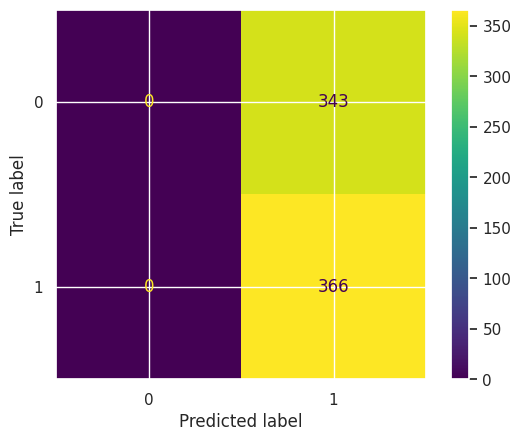

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

#Modeling
model2 = LogisticRegression(C=0.8,
                           random_state=1234,
                           solver='lbfgs')
model2.fit(x_train, y_train)
y_pred_logistic = model2.predict(x_test)

# Evaluate Model
print('Test Accuracy Score is {:.3}'.format(accuracy_score(y_test, y_pred_logistic)))
print('Test f1_score Score is {:.3}'.format(f1_score(y_test, y_pred_logistic)))
print('Test roc_auc_score Score is {:.3}'.format(roc_auc_score(y_test, y_pred_logistic)))

# Confusion Matrix
print(pd.DataFrame(confusion_matrix(y_test,y_pred_logistic)))

cm_logistic_us = confusion_matrix(y_test, y_pred_logistic, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=model2.classes_)
disp.plot()
plt.show()

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.52      1.00      0.68       366

    accuracy                           0.52       709
   macro avg       0.26      0.50      0.34       709
weighted avg       0.27      0.52      0.35       709



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN (undersampling)

test accuracy score = 0.609308885754584
test f1_score = 0.6601226993865031
test roc_auc_score = 0.6050956682438784


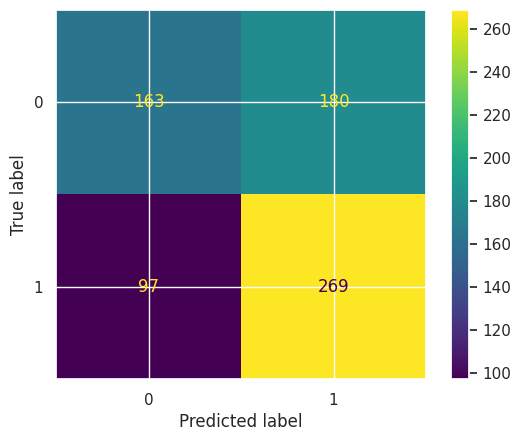

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

#Modeling
knn = KNeighborsClassifier(n_neighbors = 27, metric = "euclidean")
knn.fit(x_train_normalized,y_train)

# Calculate test accuracy
y_pred_knn =knn.predict(x_test_normalized)
print(f'test accuracy score = {accuracy_score(y_test,y_pred_knn)}')
print(f'test f1_score = {f1_score(y_test,y_pred_knn)}')
print(f'test roc_auc_score = {roc_auc_score(y_test,y_pred_knn)}')

cm_knn_under = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_under,display_labels=knn.classes_)
disp.plot()
plt.show()

In [86]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.48      0.54       343
           1       0.60      0.73      0.66       366

    accuracy                           0.61       709
   macro avg       0.61      0.61      0.60       709
weighted avg       0.61      0.61      0.60       709



## Decision Tree (undersampling)

In [87]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

#Create Decision Tree (Empty Object)
Music_Tree=DecisionTreeClassifier(criterion="entropy", max_depth = 5)

#Train the decision tree
Music_Tree.fit(x_train,y_train)

y_pred_tree = Music_Tree.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree))

from sklearn.metrics import accuracy_score
Music_TreeAcc=accuracy_score(y_pred_tree,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(Music_TreeAcc*100))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63       343
           1       0.66      0.78      0.71       366

    accuracy                           0.68       709
   macro avg       0.68      0.67      0.67       709
weighted avg       0.68      0.68      0.67       709

Decision Tree accuracy is: 67.56%


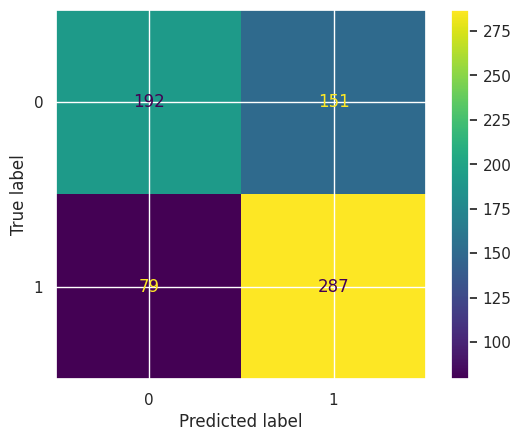

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm_tree = confusion_matrix(y_test, y_pred_tree, labels=Music_Tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=Music_Tree.classes_)
disp.plot()
plt.show()

In [90]:
# use decision tree to get feature importance
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=Music_Tree.feature_importances_,
            y=x_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(template='plotly_dark', title='<b>Estimating feature importance through the Decision Tree model', title_x=0.5,
                 xaxis_title="Feature importance", yaxis_title='Feature')

fig.show()

We found that like/view ratio is the most important feature, followed by comment/view ratio. In contrast, a track’s audio features are not as predictive as we expected. Speechiness and Acousticness have relatively higher importance than others, but the impacts are slight compared to streaming features.


## Random Forest Classifier

test accuracy score = 0.6840620592383639
test f1_score = 0.6981132075471698
test roc_auc_score = 0.6865568781171821


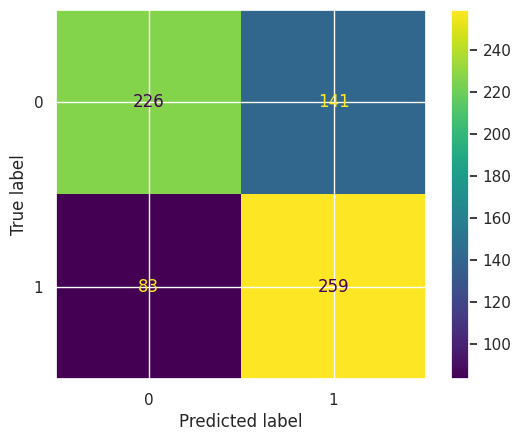

In [ ]:
# Modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

#Modeling
model4=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1234,max_leaf_nodes=8)
model4.fit(x_train,y_train)

# Calculate test accuracy
y_pred_rf=model4.predict(x_test)
print(f'test accuracy score = {accuracy_score(y_test,y_pred_rf)}')
print(f'test f1_score = {f1_score(y_test,y_pred_rf)}')
print(f'test roc_auc_score = {roc_auc_score(y_test,y_pred_rf)}')

cm_rf_under = confusion_matrix(y_test, y_pred_rf, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_under,display_labels=model4.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       367
           1       0.65      0.76      0.70       342

    accuracy                           0.68       709
   macro avg       0.69      0.69      0.68       709
weighted avg       0.69      0.68      0.68       709



Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyper parameter tuning
param_grid={'n_estimators': [100, 200],
            'max_features': [2,4,6],
            'max_depth': [4,8],
            'criterion':['gini'],
            'min_samples_split': [4,6,8]}

rf_cv = RandomForestClassifier()

# use this to try different parameters, will get the best regressor, optimal model
grid_search = GridSearchCV(rf_cv,
                           param_grid,
                           cv = 5, # cross validation,
                           scoring='f1_micro',
                           return_train_score = True)

grid_search.fit(x_train,y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-0b1ac3df2bf0>", line 21, in <cell line: 21>
    grid_search.fit(x_train,y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return

In [ ]:
print('Best hyperparameters are: '+str(grid_search.best_params_))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-fceef1837e7a>", line 1, in <cell line: 1>
    print('Best hyperparameters are: '+str(grid_search.best_params_))
AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_cont

In [ ]:
# best random forest
rfc1=RandomForestClassifier(random_state=1234, max_features=4, n_estimators= 100, max_depth=8, min_samples_split =8, criterion='gini')

In [ ]:
rfc1.fit(x_train, y_train)
y_pred_rfbest=rfc1.predict(x_test)

print(f'test accuracy score = {accuracy_score(y_test,y_pred_rfbest)}')
print(f'test f1_score = {f1_score(y_test,y_pred_rfbest)}')
print(f'test roc_auc_score = {roc_auc_score(y_test,y_pred_rfbest)}')

test accuracy score = 0.688293370944993
test f1_score = 0.7033557046979866
test roc_auc_score = 0.690667367649636


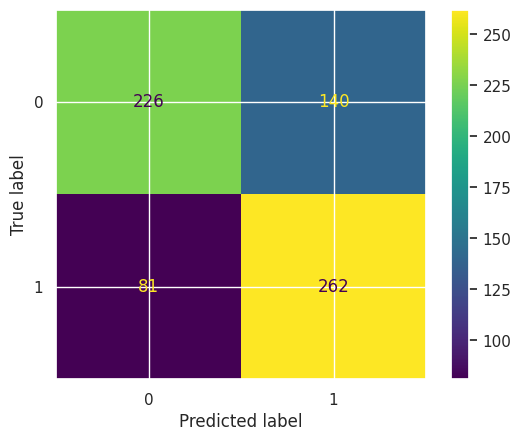

In [ ]:
cm_rf_best = confusion_matrix(y_test, y_pred_rfbest, labels=rfc1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_best,display_labels=rfc1.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rfbest))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       366
           1       0.65      0.76      0.70       343

    accuracy                           0.69       709
   macro avg       0.69      0.69      0.69       709
weighted avg       0.70      0.69      0.69       709



## Neural Network ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

              precision    recall  f1-score   support

           0       0.54      0.49      0.51       367
           1       0.51      0.56      0.53       342

    accuracy                           0.52       709
   macro avg       0.52      0.52      0.52       709
weighted avg       0.53      0.52      0.52       709



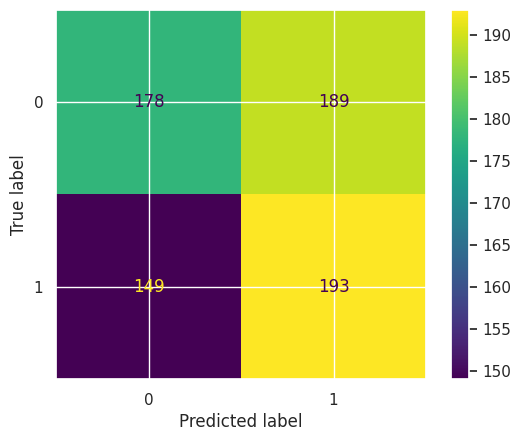

In [ ]:
from sklearn.neural_network import MLPClassifier

plainANN = MLPClassifier(random_state = 1234, max_iter = 10000,solver = 'sgd', hidden_layer_sizes=(5,5))
plainANN.fit(x_train_normalized, y_train)
y_pred_plainANN = plainANN.predict(x_test_normalized)

print(classification_report(y_test, y_pred_plainANN))
cm_ann = confusion_matrix(y_test, y_pred_plainANN, labels = plainANN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann,display_labels=plainANN.classes_)
disp.plot()
plt.show()

# Model Comparison

In [ ]:
accuracy_scores = [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_plainANN)]
accuracy_scores

[0.4823695345557123,
 0.613540197461213,
 0.6614950634696756,
 0.6840620592383639,
 0.5232722143864598]

In [ ]:
f1_scores = [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_plainANN)]
f1_scores

[0.6508087535680305,
 0.6557788944723618,
 0.6891191709844561,
 0.6981132075471698,
 0.5331491712707183]

In [ ]:
models_name = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Neural Network']
models_name

['Logistic Regression',
 'KNN',
 'Decision Tree',
 'Random Forest',
 'Neural Network']

In [ ]:
results_summary = pd.DataFrame()
results_summary['models_name'] = models_name
results_summary['accuracy_scores'] = accuracy_scores
results_summary['f1_scores'] = f1_scores

In [ ]:
results_summary

,models_name,accuracy_scores,f1_scores
0,Logistic Regression,0.482370,0.650809
1,KNN,0.613540,0.655779
2,Decision Tree,0.661495,0.689119
3,Random Forest,0.684062,0.698113
4,Neural Network,0.523272,0.533149


Text(0.5, 1.0, 'Model Comparison')

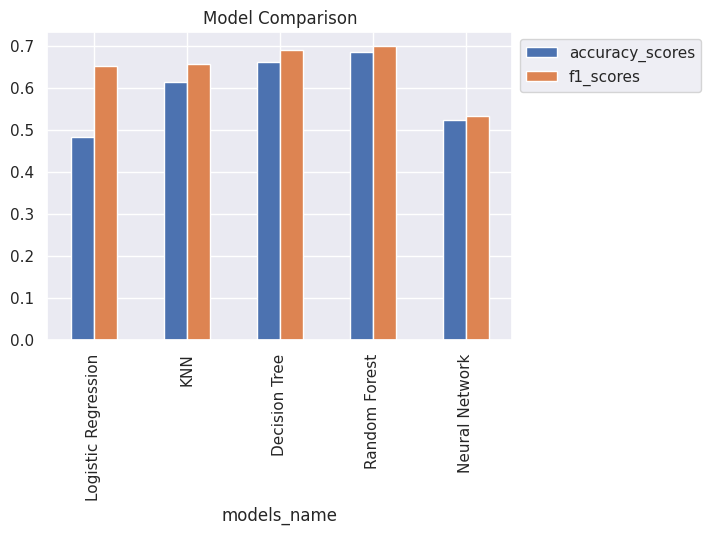

In [ ]:
plt = results_summary.plot(
        x='models_name',
        y=['accuracy_scores','f1_scores'],
        kind='bar',
        figsize=(6,4))
plt.legend(bbox_to_anchor =(1 ,1))
plt.set_title('Model Comparison')

In [ ]:
from sklearn.metrics import r2_score

df_models = pd.DataFrame(data=None, columns=['Algorithm', 'r2_train', 'r2_test'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name: str):
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)
    r2_train = r2_score(y_tr, y_pred_train)
    r2_test = r2_score(y_te, y_pred_test)
    df_models.loc[len(df_models.index)] = [model_name, r2_train, r2_test]

make_model(x_train, x_test, y_train, y_test, LinearRegression(), 'LinearRegression')
make_model(x_train, x_test, y_train, y_test, RandomForestRegressor(), 'RandomForest')

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='r2_train', x=df_models.Algorithm, y=df_models.r2_train),
    go.Bar(name='r2_test', x=df_models.Algorithm, y=df_models.r2_test)
])
fig.update_layout(template='plotly_dark', title='Model Comparison: R2 for train and test', title_x=0.5)

# Use Case

Our model can be used to predict if a newly released song will get into the billboard based on its audio features and selected streaming features. Take a recent song “Back to me” by The Rose as an example. With Spotify API and Youtube, we were able to get the features and store them in a dataframe. Using our final model, we get a prediction that this song will not get into the billboard.  

In [ ]:
#Get api
import requests

client_id = '7d1d680c656048fcb44444c2e08b7365'
client_secret = '8be4a1a9b236419dbee19e25782980eb'

token_url = 'https://accounts.spotify.com/api/token'
search_url = 'https://api.spotify.com/v1/search'

auth_response = requests.post(token_url, data = {'grant_type': 'client_credentials', 'client_id': client_id, 'client_secret': client_secret,})
api_token = auth_response.json()['access_token']

In [ ]:
song_name = ['Back To Me']
#for i in range(len(hot_100_2020)):
    #if hot_100.iloc[i, 8] == 2020 and hot_100.iloc[i, 9] == 9 and hot_100.iloc[i, 10] == 26:
        #song_name.append(hot_100_2020.iloc[i, 0])

song_features = []
for j in song_name:
    search_params = {'q': j, 'type': 'track', 'limit': 1}
    headers = {'Authorization': f'Bearer {api_token}'}

    search_response = requests.get(search_url, params = search_params, headers = headers)
    if search_response.status_code == 200:
        search_info = search_response.json()
        # Get the Spotify Track ID
        if search_info['tracks']['items']:
            track_id = search_info['tracks']['items'][0]['id']

            # Use the obtained track ID to get detailed information about the song
            features_url = f'https://api.spotify.com/v1/audio-features/{track_id}'
            features_response = requests.get(features_url, headers=headers)
            if features_response.status_code == 200:
                track_info = features_response.json()
                danceability = track_info.get('danceability')
                energy = track_info.get('energy')
                key = track_info.get('key')
                loudness = track_info.get('loudness')
                speechiness = track_info.get('speechiness')
                # mode = track_info.get('mode')
                acousticness = track_info.get('acousticness')
                instrumentalness = track_info.get('instrumentalness')
                liveness = track_info.get('liveness')
                valence = track_info.get('valence')
                tempo = track_info.get('tempo')
                song_features.append((j, danceability, energy, loudness, key, speechiness, acousticness, instrumentalness, liveness, valence, tempo))
            else:
                print("Error occurred while requesting track information:", track_response.status_code)
        else:
            print("No track found for the given song name.")
    else:
        print("Error occurred while searching for the song:", search_response.status_code)

In [ ]:
song_features

[('Back To Me',
  0.595,
  0.835,
  -3.226,
  1,
  0.0406,
  0.0518,
  0,
  0.476,
  0.563,
  130.033)]

In [ ]:
song_feature_table = pd.DataFrame(song_features, columns = ['Title', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'])
song_feature_table.head()
test_case = song_feature_table.iloc[:,1:]
test_case

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.595,0.835,-3.226,1,0.0406,0.0518,0,0.476,0.563,130.033


In [ ]:
test_case['Duration_ms'] = 3*60*60 + 43*60

In [ ]:
# come back to me
btm_view = 26 * 10**6
btm_comment = 32463
btm_like = 763000

In [ ]:
test_case['like_view_ratio'] = btm_like / btm_view
test_case['cmt_view_ratio'] = btm_comment / btm_view

In [ ]:
test_case

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,like_view_ratio,cmt_view_ratio
0,0.595,0.835,-3.226,1,0.0406,0.0518,0,0.476,0.563,130.033,13380,0.029346,0.001249


In [ ]:
test_case_pred = Music_Tree.predict(test_case)

In [ ]:
test_case_pred


array([0])

Our model predicts that this song will not enter billboard

**Thank you for reading**